In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Load the Data

In [2]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])

# the label is 1 for the 'Abnormal' class, the label is 0 for the 'Normal' class
for i in range(310):
    if df.iloc[i,6]==b'Abnormal':
        df.iloc[i,6]=1
    if df.iloc[i,6]==b'Normal':
        df.iloc[i,6]=0
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


# Making scatterplots of the independent variables in the dataset.

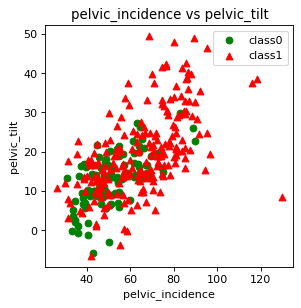

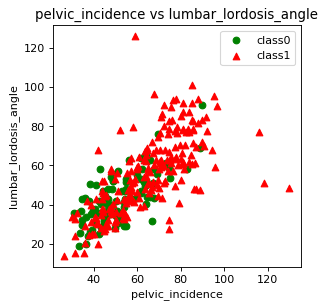

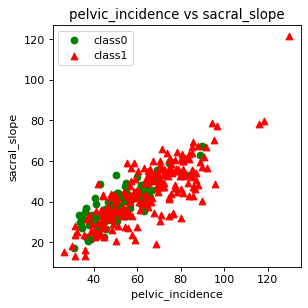

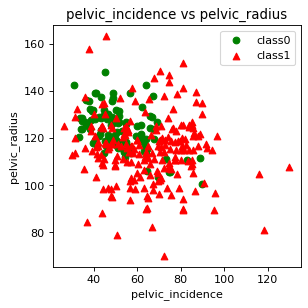

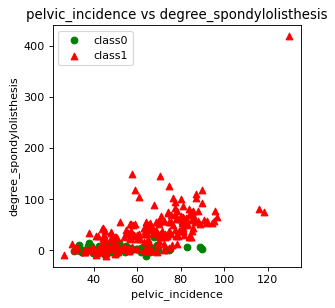

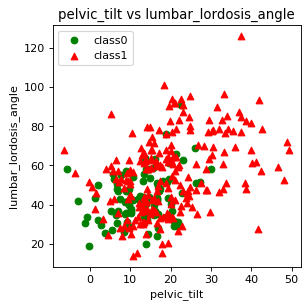

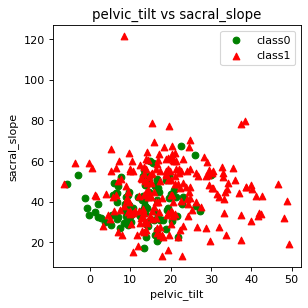

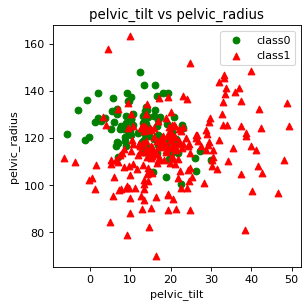

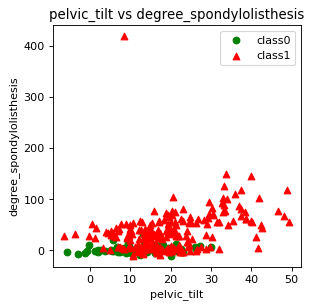

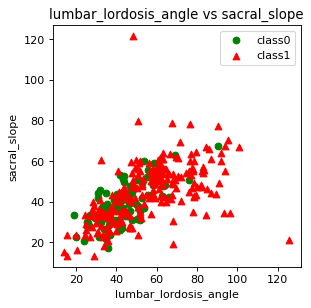

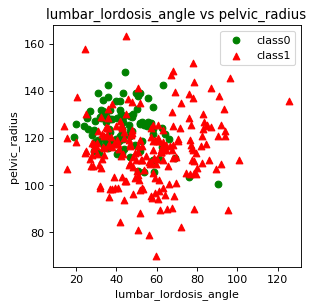

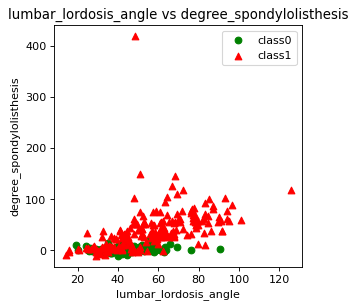

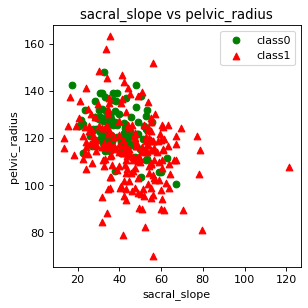

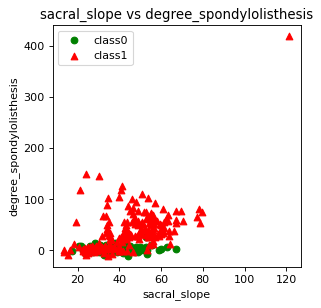

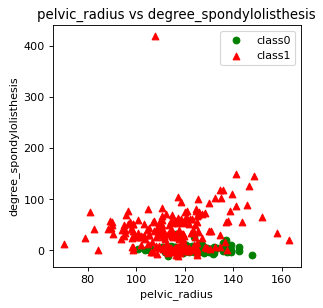

In [3]:
df_class1=df.loc[df['class']==1]
df_class0=df.loc[df['class']==0]

#we will plot each pair of features using this function
def scat(x,y):
    plt.figure(figsize=(4, 4), dpi=80)
    a=plt.scatter(df_class0[x],df_class0[y],c='g',marker='o')
    b=plt.scatter(df_class1[x],df_class1[y],c='r',marker='^')
    plt.title(x+' '+'vs'+' '+y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend((a,b),('class0','class1'))
    plt.show()

#now, we plot each pair of our features
scat('pelvic_incidence','pelvic_tilt')
scat('pelvic_incidence','lumbar_lordosis_angle')  
scat('pelvic_incidence','sacral_slope')  
scat('pelvic_incidence','pelvic_radius') 
scat('pelvic_incidence','degree_spondylolisthesis')  
scat('pelvic_tilt','lumbar_lordosis_angle') 
scat('pelvic_tilt','sacral_slope')
scat('pelvic_tilt','pelvic_radius')
scat('pelvic_tilt','degree_spondylolisthesis')
scat('lumbar_lordosis_angle','sacral_slope')
scat('lumbar_lordosis_angle','pelvic_radius')
scat('lumbar_lordosis_angle','degree_spondylolisthesis')
scat('sacral_slope','pelvic_radius')
scat('sacral_slope','degree_spondylolisthesis')
scat('pelvic_radius','degree_spondylolisthesis')


# Another simple way

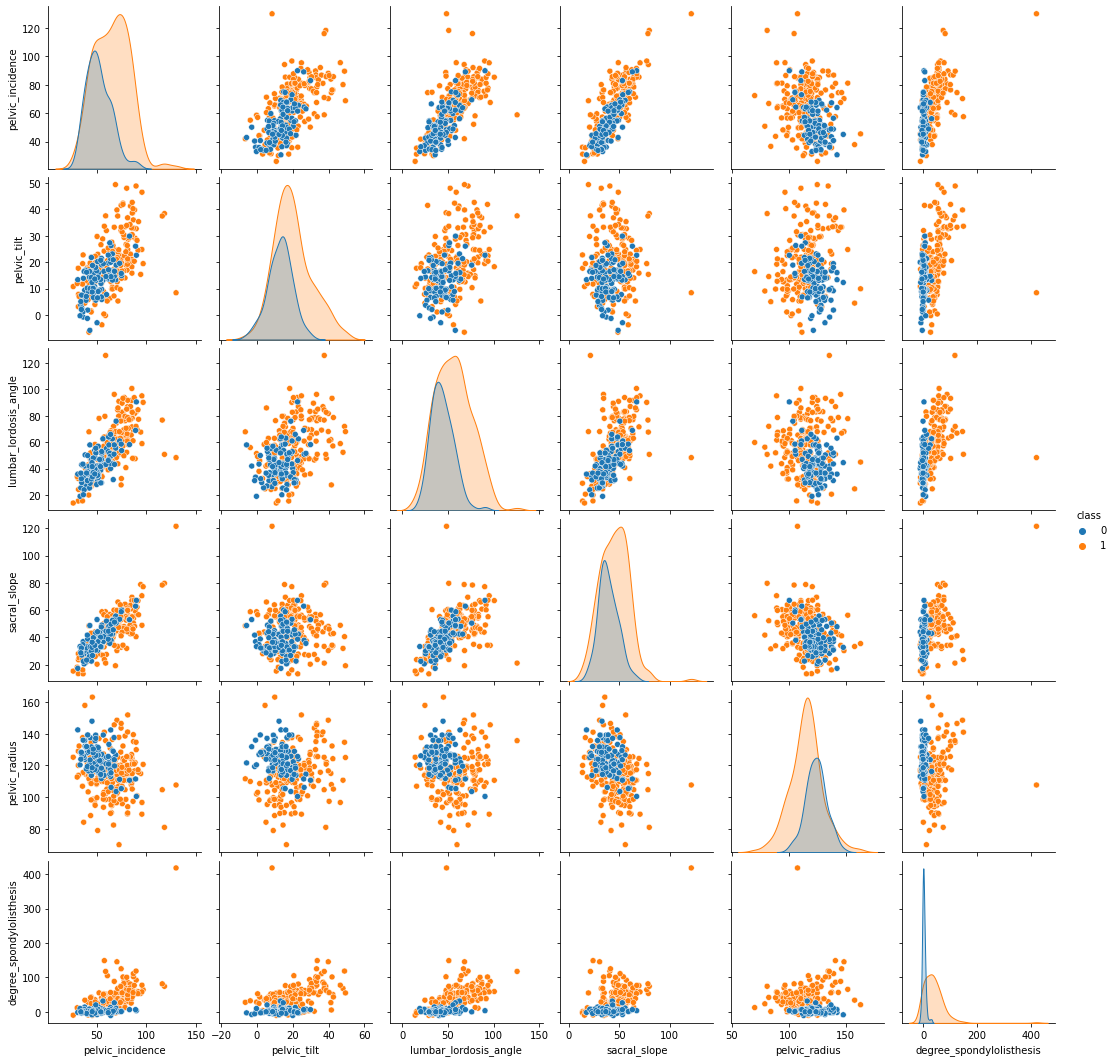

In [4]:
#we can also plot each pair of features using the seaborn package
sns.pairplot(df,hue='class')
plt.show()

#  Making boxplots for each of the independent variables 

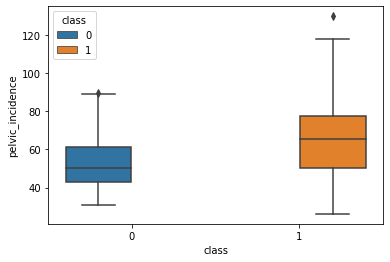

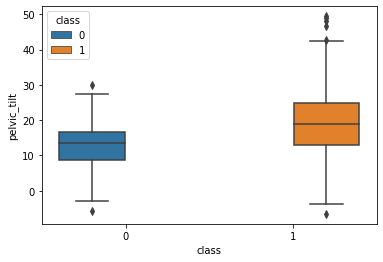

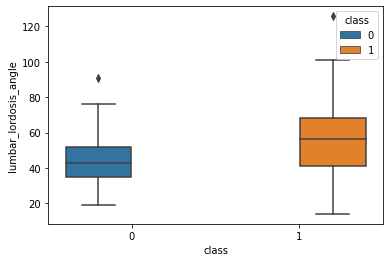

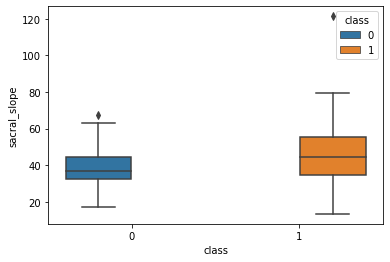

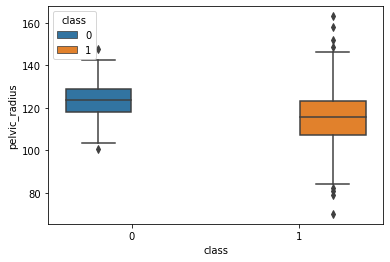

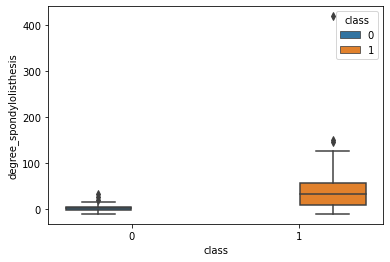

In [5]:
sns.boxplot(x='class',y='pelvic_incidence',hue='class',data=df)
plt.show()
sns.boxplot(x='class',y='pelvic_tilt',hue='class',data=df)
plt.show()
sns.boxplot(x='class',y='lumbar_lordosis_angle',hue='class',data=df)
plt.show()
sns.boxplot(x='class',y='sacral_slope',hue='class',data=df)
plt.show()
sns.boxplot(x='class',y='pelvic_radius',hue='class',data=df)
plt.show()
sns.boxplot(x='class',y='degree_spondylolisthesis',hue='class',data=df)
plt.show()


# Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
# here we concatenate 70 instances of the 0 class, and 140 instances of the 1 class for the training set
df_trainset=pd.concat([df_class0[0:70],df_class1[0:140]])

#similary for the test set, using the rest of samples
df_testset=pd.concat([df_class0[70:],df_class1[140:]])

df_trainset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


#  Testing all the data in the test database with k nearest neighbors. Taking de-cisions by majority polling. Ploting train and test errors in terms of k for k∈ {208,205, . . . ,7,4,1,}(in reverse order). Finding the confusion matrix, true positive rate, true negative rate, precision, andF1-score with optimal k

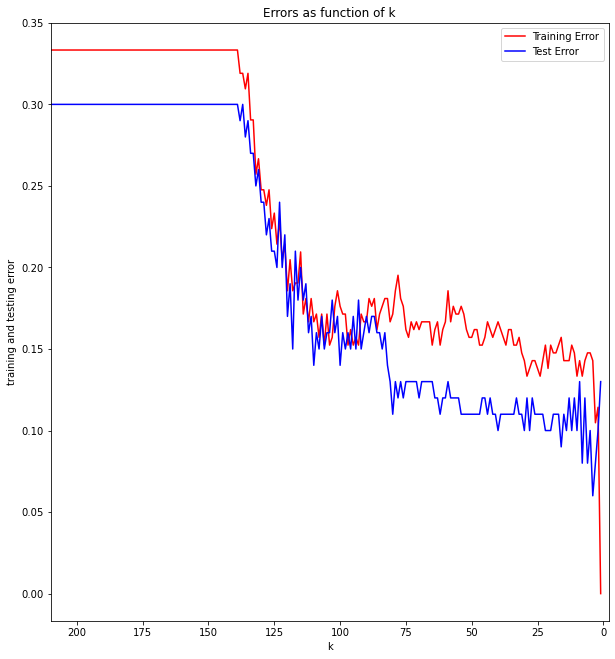

In [7]:
#here we seperate the feature vector from the label, in order to learn the model
trainset_x = np.array(df_trainset[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])
trainset_y = np.array(df_trainset['class'])
trainset_y = np.array([0 if r == 0 else 1 for r in trainset_y]) #this line is to convert the 'unkown' label types of trainset_y, i get error if i don't do it

testset_x = np.array(df_testset[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])
testset_y = np.array(df_testset['class'])
testset_y = np.array([0 if r == 0 else 1 for r in testset_y])

#now we will fit the model using several values of k (number of neighbors), and compare them in the test error sence
k=np.arange(1,211,1)
test_error=[]
train_error=[]
for i in range(1,211,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainset_x,trainset_y)
    Pred_testset_y = knn.predict(testset_x)
    Pred_trainset_y = knn.predict(trainset_x)
    test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
    train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))



plt.figure(figsize=(10,11))

fig = plt.plot(k,train_error, color='red',label='Training Error')
fig = plt.plot(k,test_error, color='blue',label='Test Error')
plt.xlim([210, -2])
plt.xlabel('k')
plt.ylabel('training and testing error')
plt.title('Errors as function of k')
plt.legend()
plt.show()

In [8]:
train_error_gather=[] #we will append all the training errors for the whole assignment to answer the last question

# we can easily find the minimum test error and the associated k.
print('minimum test error is:',min(test_error))
indexk = test_error.index(min(test_error))
index_suitable_k=indexk+1
print('most suitable k is',index_suitable_k)
train_error_gather.append(train_error)

minimum test error is: 0.06000000000000005
most suitable k is 4


In [9]:
knn = KNeighborsClassifier(n_neighbors=index_suitable_k)
knn.fit(trainset_x, trainset_y)
Pred_testset_y = knn.predict(testset_x)

confusion_mat = confusion_matrix(testset_y, Pred_testset_y)
print(confusion_mat)

[[25  5]
 [ 1 69]]


In [10]:

true_posive_rate = float(confusion_mat[1][1] / (confusion_mat[1][0] + confusion_mat[1][1]))
print("TRUE POSITIVE RATE:", true_posive_rate)
ture_negative_rate = float(confusion_mat[0][0] / (confusion_mat[0][0] + confusion_mat[0][1]))
print("TRUE NEGATIVE RATE:", ture_negative_rate)
precison = confusion_mat[1,1]/(confusion_mat[0,1] + confusion_mat[1,1])
print('precison:',precison)

f_score = (2*confusion_mat[1,1])/(2*confusion_mat[1,1]+confusion_mat[1,0]+confusion_mat[0,1])
print('f_score',f_score)





TRUE POSITIVE RATE: 0.9857142857142858
TRUE NEGATIVE RATE: 0.8333333333333334
precison: 0.9324324324324325
f_score 0.9583333333333334


In [11]:
#we can use the classification_report
print(classification_report(testset_y,Pred_testset_y))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



# Since the computation time depends on the size of the training set, one mayonly use a subset of the training set. We will Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set isN∈ {10,20,30, . . . ,210}.

In [12]:
# we learn the model using several subsets of the training data, and compare the results.
df_trainset_0=df_trainset.loc[df['class']==0]
df_trainset_1=df_trainset.loc[df['class']==1]
best_error_rate=[]
best_train_error_rate=[]
optimal_k=[]
for n in range(10, 211, 10):
    test_error=[]
    
    nth_trainset=pd.concat([df_trainset_0[0:int(round(n/3))], df_trainset_1[0:int(round(2*n/3))]])
    nth_trainset_x = np.array(nth_trainset[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])
    nth_trainset_y = np.array(nth_trainset['class'])
    nth_trainset_y = np.array([0 if u == 0 else 1 for u in nth_trainset_y])
    for k in range(1,n,5):
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(nth_trainset_x,nth_trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y=knn.predict(trainset_x) 
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
    
    best_error_rate.append(min(test_error))
    best_train_error_rate.append(min(train_error))
    optimal_k.append((test_error.index(min(test_error)))*5+1)
    


    

In [13]:
# we find the best error rate, and the corresponding k for each subset of the training data
print('best error rates are:',best_error_rate)
print('the optimal values of k are',optimal_k)

train_error_gather.append(best_train_error_rate)

best error rates are: [0.25, 0.18999999999999995, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.26, 0.22999999999999998, 0.17000000000000004, 0.16000000000000003, 0.14, 0.13, 0.13, 0.12, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]
the optimal values of k are [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]


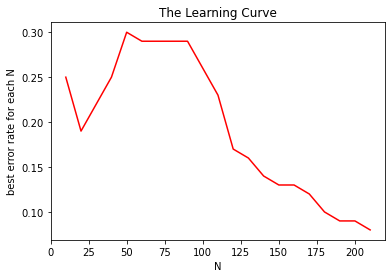

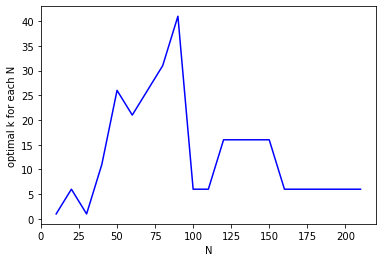

In [14]:
plt.plot(range(10, 211, 10), best_error_rate, color='r')
plt.xlabel("N")
plt.ylabel("best error rate for each N")
plt.title('The Learning Curve')
plt.show()

plt.plot(range(10, 211, 10), optimal_k, color='b')
plt.xlabel("N")
plt.ylabel("optimal k for each N")
plt.show()

# Replacing the Euclidean metric with the following metrics.

In [15]:
test_error=[]

train_error=[]


for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,p=1)
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y=knn.predict(trainset_x) 
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))

train_error_gather.append(min(train_error))
test_error

[0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.12,
 0.13,
 0.13,
 0.13,
 0.14,
 0.13,
 0.15000000000000002,
 0.15000000000000002,
 0.14,
 0.14,
 0.16000000000000003,
 0.15000000000000002,
 0.19999999999999996,
 0.19999999999999996,
 0.21999999999999997,
 0.20999999999999996,
 0.22999999999999998,
 0.20999999999999996,
 0.21999999999999997,
 0.24,
 0.28,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [16]:
# get the k's with lowest test error
optimal_k_values=[]
for i in range (0,39):
    if test_error[i]==min(test_error):
        optimal_k_values.append(1+i*5) #as observed above,there are several k's with the same test error rate in this case,(k=1,6,11,26)
        
optimal_k_values

[1, 6, 11, 26]

In [17]:
p_values = []
for i in np.arange(0.1, 1.1, 0.1):
    p_values.append(10**i)
p_values

[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688797,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272724,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [18]:
test_error={}
for i in p_values:
        knn=KNeighborsClassifier(n_neighbors=26,p=i) #since we had multiple values of k with the same minimum error, we will choose one of them (i.e. k=26)
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        test_error.update({i:1- accuracy_score(testset_y,Pred_testset_y)})
test_error    

{1.2589254117941673: 0.09999999999999998,
 1.5848931924611136: 0.09999999999999998,
 1.9952623149688797: 0.10999999999999999,
 2.51188643150958: 0.09999999999999998,
 3.1622776601683795: 0.10999999999999999,
 3.9810717055349722: 0.09999999999999998,
 5.011872336272724: 0.10999999999999999,
 6.309573444801933: 0.10999999999999999,
 7.943282347242816: 0.10999999999999999,
 10.0: 0.10999999999999999}

In [19]:
optimal_p_values=[]
for i in np.arange(0.1, 1.1, 0.1):
    if test_error[10**i]==min(test_error.values()):
        optimal_p_values.append(i) 
        
print('optimal p values are:',optimal_p_values)

optimal p values are: [0.1, 0.2, 0.4, 0.6]


In [20]:
test_error=[]
train_error=[]
for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y=knn.predict(trainset_x)
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))

train_error_gather.append(min(train_error))

test_error    

[0.13,
 0.09999999999999998,
 0.12,
 0.07999999999999996,
 0.10999999999999999,
 0.12,
 0.12,
 0.09999999999999998,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.10999999999999999,
 0.14,
 0.12,
 0.15000000000000002,
 0.14,
 0.18999999999999995,
 0.18000000000000005,
 0.18000000000000005,
 0.18000000000000005,
 0.20999999999999996,
 0.20999999999999996,
 0.25,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [21]:
optimal_k_values=[]
for i in range (0,39):
    if test_error[i]==min(test_error):
        optimal_k_values.append(1+i*5) #as observed above,there are several k's with the same test error rate in this case,(k=1,6,11,26)
        
print('optimal k value is:',optimal_k_values)

optimal k value is: [16]


# Mahalanobis Distance.


In [22]:
test_error=[]
train_error=[]


for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(trainset_x))})
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y = knn.predict(trainset_x)
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
        
train_error_gather.append(min(train_error))       
test_error    

[0.32999999999999996,
 0.19999999999999996,
 0.18999999999999995,
 0.18000000000000005,
 0.21999999999999997,
 0.19999999999999996,
 0.20999999999999996,
 0.21999999999999997,
 0.26,
 0.20999999999999996,
 0.20999999999999996,
 0.25,
 0.28,
 0.27,
 0.29000000000000004,
 0.30000000000000004,
 0.29000000000000004,
 0.27,
 0.29000000000000004,
 0.27,
 0.29000000000000004,
 0.29000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [23]:
optimal_k_values=[]
for i in range (0,39):
    if test_error[i]==min(test_error):
        optimal_k_values.append(1+i*5) #as observed above,there are several k's with the same test error rate in this case,(k=1,6,11,26)
        
print('optimal k value is:',optimal_k_values)

optimal k value is: [16]


# Summarize the results in a table 

|Method Used	 |                              |Minimum test error (for k=k*)|
|-----------------------|                              |----------------------|
|i(a) Manhattan Distance with p= 1|	                    |0.10999999999999999|
|i(b) with log10(p)∈ {0.1,0.2,0.3, . . . ,1}|	        |0.09999999999999998|
|i(c) Chebyshev Distance	|                            |0.07999999999999996|
|ii Mahalanobis Distance	 |                               |0.18000000000000005|


#  The majority polling decision can be replaced by weighted decision, in which theweight of each point in voting is inversely proportionalto its distance from thequery/test data point. In this case, closer neighbors of a query point will havea greater influence than neighbors which are further away.

In [24]:
test_error=[]
train_error=[]
for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y=knn.predict(trainset_x)
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
        
train_error_gather.append(min(train_error))        
test_error    

[0.13,
 0.09999999999999998,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.13,
 0.14,
 0.14,
 0.12,
 0.14,
 0.14,
 0.13,
 0.13,
 0.13,
 0.14,
 0.14,
 0.17000000000000004,
 0.18999999999999995,
 0.18999999999999995,
 0.19999999999999996,
 0.22999999999999998,
 0.25,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.28]

In [25]:
best_error_rate=min(test_error)
best_error_rate

0.09999999999999998

# using manhatan

In [26]:
test_error=[]
train_error=[]
for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,weights='distance',p=1)
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y = knn.predict(trainset_x)
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
        
train_error_gather.append(min(train_error))        
test_error    

[0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.10999999999999999,
 0.09999999999999998,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.13,
 0.13,
 0.10999999999999999,
 0.12,
 0.14,
 0.14,
 0.13,
 0.13,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.16000000000000003,
 0.17000000000000004,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.24,
 0.25,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.29000000000000004]

In [27]:
best_error_rate=min(test_error)
best_error_rate

0.09999999999999998

#  using chebyshev

In [28]:
test_error=[]
train_error=[]
for k in range(1,200,5):
        knn=KNeighborsClassifier(n_neighbors=k,weights='distance',metric='chebyshev')
        knn.fit(trainset_x,trainset_y)
        Pred_testset_y = knn.predict(testset_x)
        Pred_trainset_y = knn.predict(trainset_x)
        test_error.append(1- accuracy_score(testset_y,Pred_testset_y))
        train_error.append(1- accuracy_score(trainset_y,Pred_trainset_y))
        
train_error_gather.append(min(train_error)) 
test_error    

[0.13,
 0.13,
 0.12,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.12,
 0.10999999999999999,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.15000000000000002,
 0.14,
 0.16000000000000003,
 0.16000000000000003,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.20999999999999996,
 0.22999999999999998,
 0.26,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.28]

In [29]:
best_error_rate=min(test_error)
best_error_rate

0.10999999999999999

#  the lowest training error rate in this code

In [30]:
#it is zero as shown
minimum_training_error_rate=np.array(train_error_gather,dtype=object)
print('minimum training error in the homework is:', minimum_training_error_rate.all().min())

minimum training error in the homework is: 0.0
